In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

載入資料

In [3]:
train_data = pd.read_csv(r"C:\Users\jing5\Documents\HW2\TitanicData\train.csv")
test_data = pd.read_csv(r"C:\Users\jing5\Documents\HW2\TitanicData\test.csv")

print(train_data.info())
print(test_data.info())

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\User\\Documents\\PythonHw2\\TitanicData\\train.csv'

合併資料進行前處理

In [740]:
# 使用 pd.concat() 合併資料
total_data = pd.concat([train_data, test_data], ignore_index=True)

print(total_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB
None


PassengerId

In [741]:
# 查看 PassengerId 欄位的前 10 筆資料
print(train_data['PassengerId'].head(15))

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
Name: PassengerId, dtype: int64


Survived

[ 0.  1. nan]


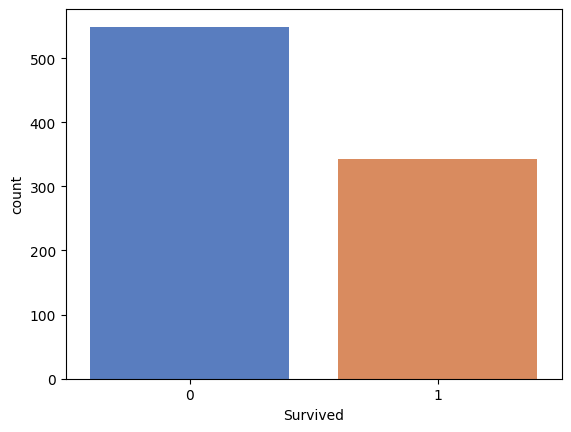

In [742]:
# 檢查 Survived 欄位的唯一值，包含 NaN
print(total_data['Survived'].unique())

# 繪製 Survived 欄位的分佈圖
sns.countplot(data=train_data, x='Survived',palette='muted')
plt.show()

Pclass

Pclass 唯一值: [3 1 2]


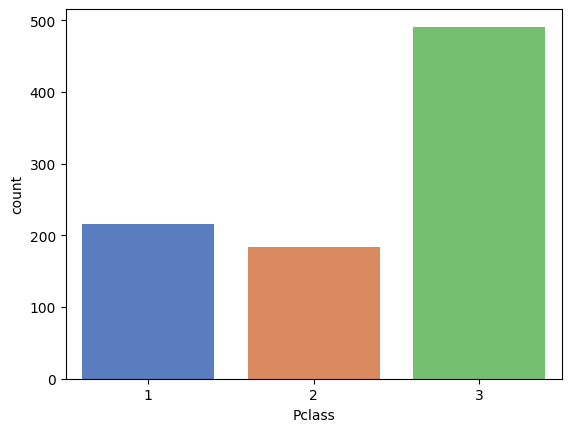

In [743]:
# 檢查 Pclass 欄位的唯一值
print("Pclass 唯一值:", total_data['Pclass'].unique())

# 繪製 Pclass 欄位的分佈圖
sns.countplot(train_data, x='Pclass',palette='muted')
plt.show()

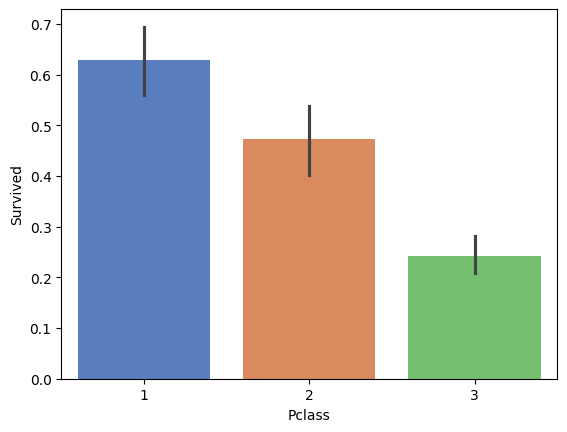

In [744]:
# 根據 Pclass 和 Survived 做可視化分析
sns.barplot(x='Pclass', y='Survived', data=train_data,palette='muted')
plt.show()

Sex

Sex 唯一值: ['male' 'female']


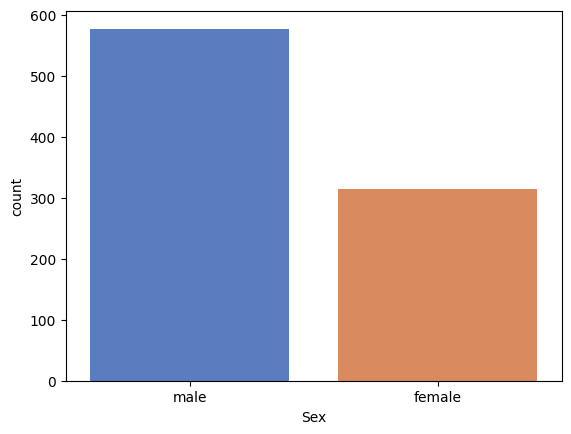

In [745]:
# 檢查 Sex 欄位的唯一值
print("Sex 唯一值:", total_data['Sex'].unique())

# 繪製 Sex 欄位的分佈圖
sns.countplot(data=train_data, x='Sex',palette='muted')
plt.show()

In [746]:
# 使用 LabelEncoder 將 Sex 欄位轉換為數值
labelencoder = LabelEncoder()
total_data['Sex'] = labelencoder.fit_transform(total_data['Sex'])

# 檢查轉換後的唯一值
print("轉換後的 Sex 唯一值:", total_data['Sex'].unique())

轉換後的 Sex 唯一值: [1 0]


Age

In [747]:
print(total_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   int64  
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(5), object(4)
memory usage: 122.8+ KB
None


In [748]:
# 使用 qcut 將 Age 欄位分為 8 組，儲存在 'Age_qcut'
train_data['Age_qcut'] = pd.qcut(train_data['Age'], 8)

# 查看 Age_qcut 的唯一值
print("Age_qcut 唯一值:", train_data['Age_qcut'].unique())

Age_qcut 唯一值: [(20.125, 24.0], (32.312, 38.0], (24.0, 28.0], NaN, (47.0, 80.0], (0.419, 16.0], (16.0, 20.125], (38.0, 47.0], (28.0, 32.312]]
Categories (8, interval[float64, right]): [(0.419, 16.0] < (16.0, 20.125] < (20.125, 24.0] < (24.0, 28.0] < (28.0, 32.312] < (32.312, 38.0] < (38.0, 47.0] < (47.0, 80.0]]


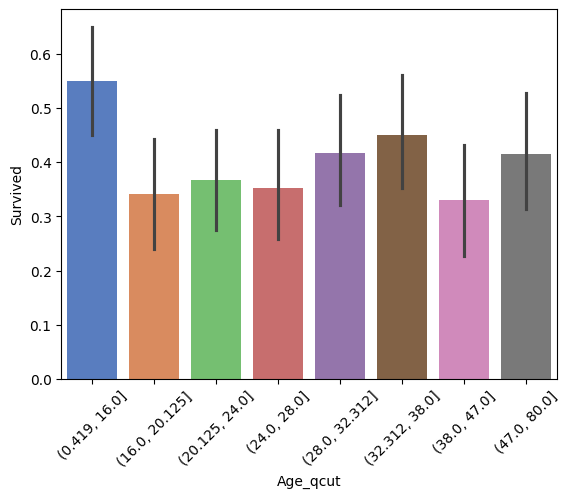

In [749]:
# Age_qcut 與 Survived 的條形圖
sns.barplot(x='Age_qcut', y='Survived', data=train_data, palette='muted')
plt.xticks(rotation=45)  # 旋轉 x 軸標籤，避免重疊
plt.show()

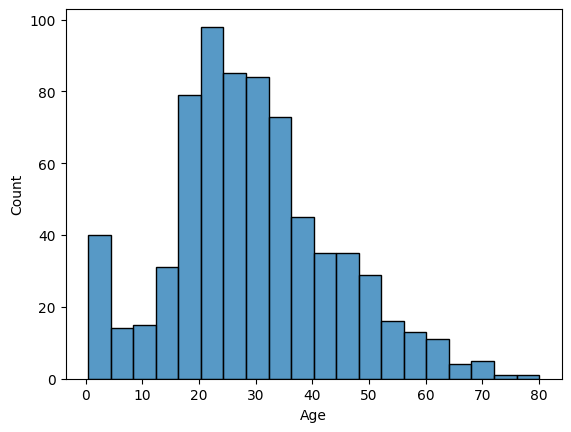

In [750]:
# 繪製 Age 欄位的直方圖
sns.histplot(train_data['Age'])
plt.show()

In [751]:
# 對 Age 欄位進行分類處理
total_data.loc[total_data['Age'] <= 16, 'Age'] = 1
total_data.loc[total_data['Age'] != 1, 'Age'] = 2

# 檢查 Age 欄位的唯一值
print(total_data['Age'].unique())

[2. 1.]


In [752]:
print(total_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   int64  
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(5), object(4)
memory usage: 122.8+ KB
None


SibSp

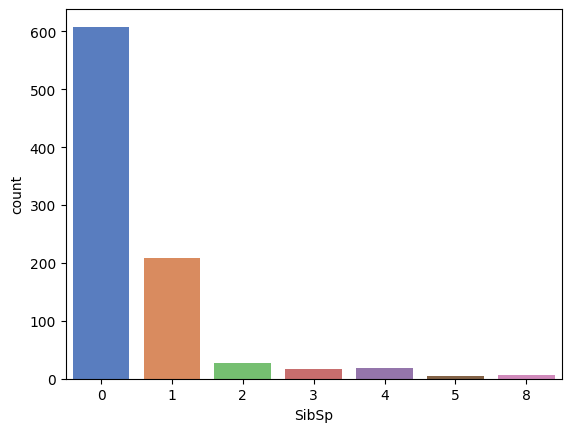

In [753]:
# 繪製 SibSp 欄位的分佈圖
sns.countplot(data=train_data, x='SibSp', palette='muted')
plt.show()

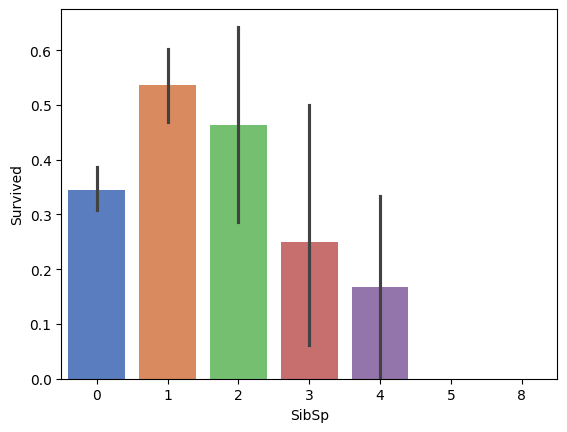

In [754]:
sns.barplot(x='SibSp', y='Survived', data=train_data, palette='muted')
plt.show()

In [755]:
# 將 SibSp 等於 1 或 2 的設為 1
total_data.loc[(total_data['SibSp'] == 1) | (total_data['SibSp'] == 2), 'SibSp'] = 1

# 將 SibSp 大於 2 的設為 2
total_data.loc[total_data['SibSp'] > 2, 'SibSp'] = 2

# 將 SibSp 等於 0 的設為 0
total_data.loc[total_data['SibSp'] < 1, 'SibSp'] = 0

# 檢視轉換後的值分佈
print(total_data['SibSp'].value_counts())

SibSp
0    891
1    361
2     57
Name: count, dtype: int64


In [756]:
print(total_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   int64  
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(5), object(4)
memory usage: 122.8+ KB
None


Parch

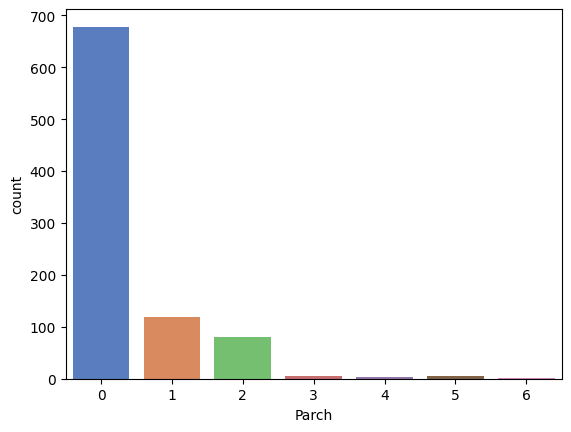

In [757]:
sns.countplot(data=train_data, x='Parch', palette='muted')
plt.show()

In [758]:
print(total_data['Parch'].value_counts())

Parch
0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: count, dtype: int64


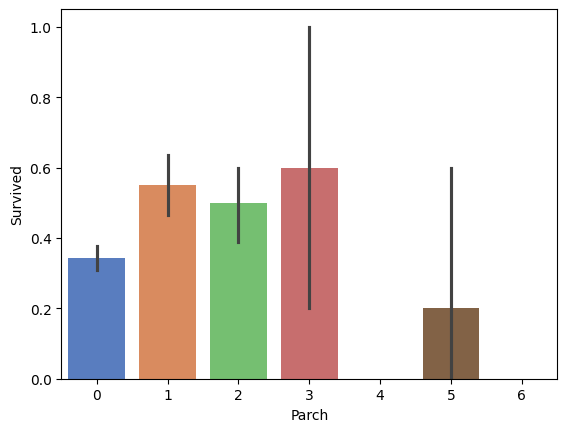

In [759]:
# 可視化 Parch 與 Survived 的關係，使用一致的 palette
sns.barplot(x='Parch', y='Survived', data=train_data, palette='muted')
plt.show()

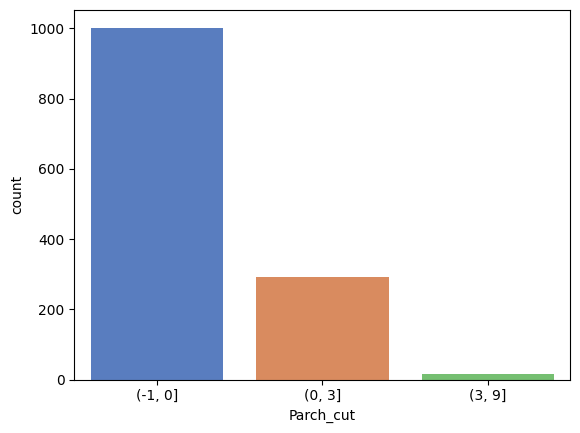

In [760]:
# 將 Parch 欄位重新分組
total_data['Parch_cut'] = pd.cut(total_data['Parch'], [-1, 0, 3, 9])

# 使用 Seaborn 繪製分組後的 Parch 欄位分佈
sns.countplot(x='Parch_cut', data=total_data, palette='muted')
plt.show()

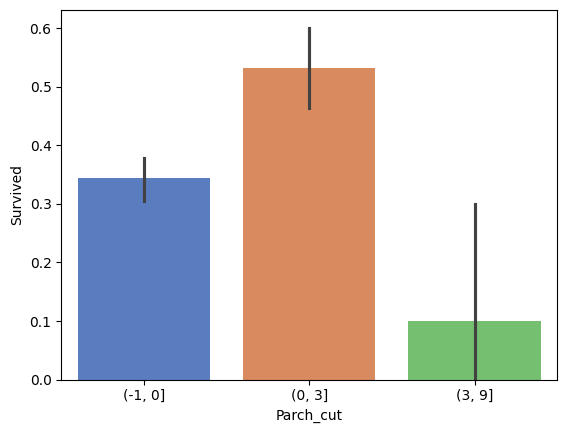

In [761]:
# 使用 seaborn 繪製分組後的 Parch_cut 與 Survived 的關係圖
sns.barplot(x='Parch_cut', y='Survived', data=total_data, palette='muted')

# 顯示圖表
plt.show()

In [762]:
# 根據觀察重新設置 Parch 的值
total_data.loc[(total_data['Parch'] > 0) & (total_data['Parch'] <= 3), 'Parch'] = 2
total_data.loc[total_data['Parch'] > 4, 'Parch'] = 4
total_data.loc[total_data['Parch'] <= 1, 'Parch'] = 1

# 查看修改後的分布
print(total_data['Parch'].value_counts())

Parch
1    1002
2     291
4      16
Name: count, dtype: int64


In [763]:
print(total_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1309 non-null   int64   
 1   Survived     891 non-null    float64 
 2   Pclass       1309 non-null   int64   
 3   Name         1309 non-null   object  
 4   Sex          1309 non-null   int64   
 5   Age          1309 non-null   float64 
 6   SibSp        1309 non-null   int64   
 7   Parch        1309 non-null   int64   
 8   Ticket       1309 non-null   object  
 9   Fare         1308 non-null   float64 
 10  Cabin        295 non-null    object  
 11  Embarked     1307 non-null   object  
 12  Parch_cut    1309 non-null   category
dtypes: category(1), float64(3), int64(5), object(4)
memory usage: 124.3+ KB
None


Fare

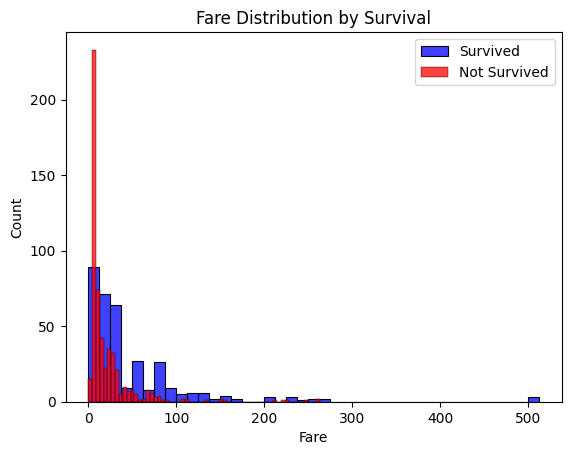

In [764]:
# 觀察票價 (Fare) 與生還 (Survived) 的關係
sns.histplot(
    train_data[train_data['Survived'] == 1]['Fare'], 
    color='blue', 
    label='Survived'
)

sns.histplot(
    train_data[train_data['Survived'] == 0]['Fare'], 
    color='red', 
    label='Not Survived'
)

# 加入圖例和標題
plt.legend()
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

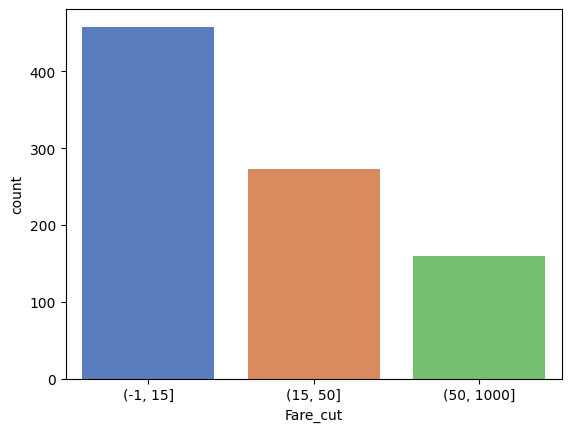

In [765]:
train_data['Fare_cut'] = pd.cut(train_data['Fare'], [-1, 15, 50, 1000])
sns.countplot(x=train_data['Fare_cut'], palette='muted')
plt.show()

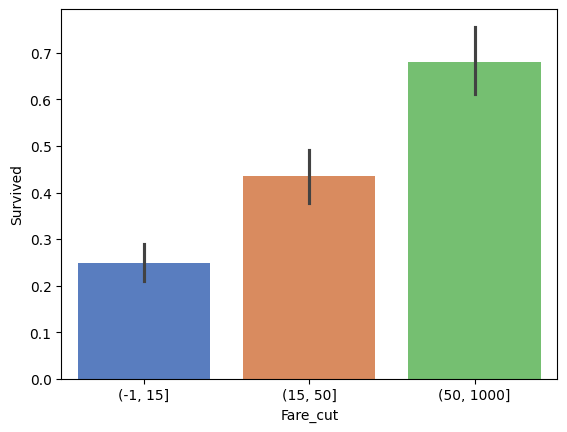

In [766]:
sns.barplot(x=train_data['Fare_cut'], y=train_data['Survived'], palette='muted')
plt.show()

In [767]:
# 將票價區間設置為特徵值
total_data.loc[total_data['Fare'] <= 15, 'Fare'] = 1
total_data.loc[(total_data['Fare'] > 15) & (total_data['Fare'] <= 50), 'Fare'] = 2
total_data.loc[total_data['Fare'] > 2, 'Fare'] = 3

# 查看修改後的 Fare 分佈
print(total_data['Fare'].value_counts())

Fare
1.0    673
2.0    395
3.0    240
Name: count, dtype: int64


In [768]:
# 補充缺失值
total_data['Fare'] = total_data['Fare'].fillna(1)

# 確認補充結果
print(total_data['Fare'].value_counts())

Fare
1.0    674
2.0    395
3.0    240
Name: count, dtype: int64


In [769]:
print(total_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1309 non-null   int64   
 1   Survived     891 non-null    float64 
 2   Pclass       1309 non-null   int64   
 3   Name         1309 non-null   object  
 4   Sex          1309 non-null   int64   
 5   Age          1309 non-null   float64 
 6   SibSp        1309 non-null   int64   
 7   Parch        1309 non-null   int64   
 8   Ticket       1309 non-null   object  
 9   Fare         1309 non-null   float64 
 10  Cabin        295 non-null    object  
 11  Embarked     1307 non-null   object  
 12  Parch_cut    1309 non-null   category
dtypes: category(1), float64(3), int64(5), object(4)
memory usage: 124.3+ KB
None


Embarked

Embarked 唯一值: ['S' 'C' 'Q' nan]
dtype: object


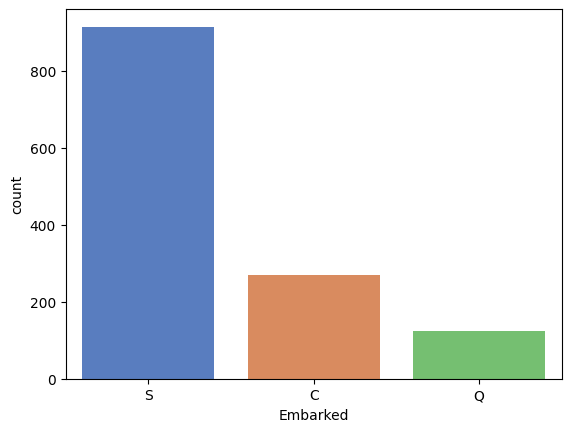

In [770]:
# 檢查 Embarked 欄位中的唯一值
print("Embarked 唯一值:", total_data['Embarked'].unique())
print("dtype:",total_data['Embarked'].dtype)

# 視覺化 Embarked 欄位的分布
sns.countplot(data=total_data, x='Embarked', palette='muted')
plt.show()

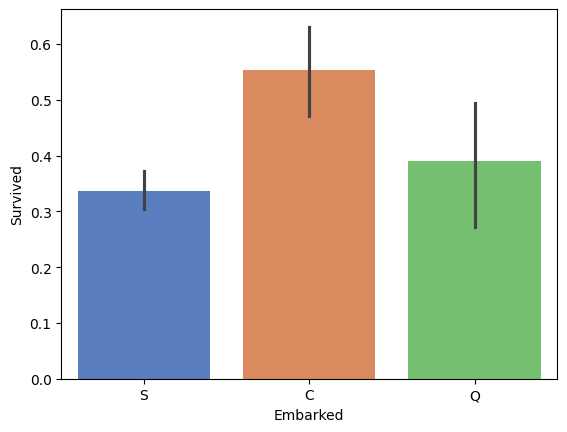

In [771]:
sns.barplot(x=train_data['Embarked'], y=train_data['Survived'], palette='muted')
plt.show()

In [772]:
total_data['Embarked'] = total_data['Embarked'].fillna('S')

# 確認 Embarked 欄位的唯一值
print("Embarked 唯一值:", total_data['Embarked'].unique())

Embarked 唯一值: ['S' 'C' 'Q']


In [773]:
# 使用 LabelEncoder 將 Embarked 欄位轉換為數值
labelencoder = LabelEncoder()
total_data['Embarked'] = labelencoder.fit_transform(total_data['Embarked'])

# 檢視 Embarked 欄位轉換後的分佈
print(total_data['Embarked'].value_counts())

Embarked
2    916
0    270
1    123
Name: count, dtype: int64


In [774]:
print(total_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1309 non-null   int64   
 1   Survived     891 non-null    float64 
 2   Pclass       1309 non-null   int64   
 3   Name         1309 non-null   object  
 4   Sex          1309 non-null   int64   
 5   Age          1309 non-null   float64 
 6   SibSp        1309 non-null   int64   
 7   Parch        1309 non-null   int64   
 8   Ticket       1309 non-null   object  
 9   Fare         1309 non-null   float64 
 10  Cabin        295 non-null    object  
 11  Embarked     1309 non-null   int64   
 12  Parch_cut    1309 non-null   category
dtypes: category(1), float64(3), int64(6), object(3)
memory usage: 124.3+ KB
None


將DataFram轉成ndarray

In [775]:
# 選擇特徵欄位並轉換為 NumPy 陣列
train_x = total_data.loc[total_data['Survived'].notnull(), ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']].values
train_y = total_data.loc[total_data['Survived'].notnull(), 'Survived'].values
train_y = train_y.reshape(-1, 1)
test_x = total_data.loc[total_data['Survived'].isnull(), ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']].values

# 檢查轉換後的 NumPy 陣列大小
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)

(891, 6)
(891, 1)
(418, 6)


In [776]:
# 初始化 MinMaxScaler 並進行正規化
minmax = MinMaxScaler()
train_x = minmax.fit_transform(train_x)
test_x = minmax.transform(test_x)

In [777]:
# 將資料轉為 Tensor 格式
# train_x = torch.tensor(train_x, dtype=torch.float32)
# train_y = torch.tensor(train_y, dtype=torch.float32)
# test_x = torch.tensor(test_x, dtype=torch.float32)